In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 32})

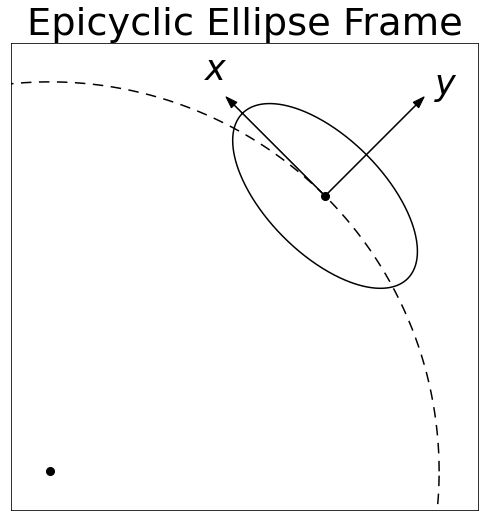

In [49]:
# Parameters
R = 1.0   # Radius of the main circular orbit
a = 0.3   # Semi-major axis of the epicycle (tangential direction)
b = 0.15  # Semi-minor axis of the epicycle (radial direction)

# Main circular orbit (but we'll show only the first quarter)
theta = np.linspace(0, 2*np.pi, 500)  # From 0 to 90 degrees
x_circle = R * np.cos(theta)
y_circle = R * np.sin(theta)

# Choose a point on the circle to center the epicycle
theta0 = np.pi / 4  # 45 degrees (within the first quarter)
x0 = R * np.cos(theta0)
y0 = R * np.sin(theta0)

# Unit vectors for radial and tangential directions at theta0
r_hat_x = np.cos(theta0)
r_hat_y = np.sin(theta0)
phi_hat_x = -np.sin(theta0)
phi_hat_y = np.cos(theta0)

# Epicyclic ellipse centered at (x0, y0)
t = np.linspace(0, 2 * np.pi, 500)
x_ellipse = x0 + a * np.cos(t) * phi_hat_x + b * np.sin(t) * r_hat_x
y_ellipse = y0 + a * np.cos(t) * phi_hat_y + b * np.sin(t) * r_hat_y

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Draw main circular orbit (only the first quarter)
ax.plot(x_circle, y_circle, linestyle=(0, (7, 5)), linewidth=1.5, c='black')

# Mark the origin
ax.plot(0, 0, 'ko', markersize=8)

# Draw epicyclic ellipse
ax.plot(x_ellipse, y_ellipse, c='black', linewidth=1.5)

# Mark the center point of the epicycle
ax.plot(x0, y0, 'ko', markersize=8)

# Draw arrows for radial (y) and tangential (x) directions
arrow_length = 0.33
# Tangential direction arrow (x)
ax.arrow(x0, y0, arrow_length * phi_hat_x, arrow_length * phi_hat_y,
         head_width=0.02, head_length=0.03, fc='black', ec='black')
# Radial direction arrow (y)
ax.arrow(x0, y0, arrow_length * r_hat_x, arrow_length * r_hat_y,
         head_width=0.02, head_length=0.03, fc='black', ec='black')

# Annotate the directions
ax.text(x0 + 1.2 * arrow_length * phi_hat_x, y0 + 1.2 * arrow_length * phi_hat_y,
        '$x$', color='black', ha='center', va='bottom', fontsize=35)
ax.text(x0 + 1.2 * arrow_length * r_hat_x, y0 + 1.2 * arrow_length * r_hat_y,
        '$y$', color='black', ha='left', va='center', fontsize=35)

# Set aspect ratio and labels
ax.set_aspect('equal')
ax.set_title("Epicyclic Ellipse Frame")

# Set limits to show only the first quarter
ax.set_xlim(-0.1, R + 0.1)
ax.set_ylim(-0.1, R + 0.1)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.grid(True)

plt.tight_layout()
plt.savefig("../Figures/epicyclic_ellipse_cs.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()